In [2]:
import networkx as nx
G = nx.DiGraph()

In [3]:
G.nodes() #empty graph

NodeView(())

In [4]:
G.add_nodes_from([i for i in range(5)])

In [5]:
G.nodes()

NodeView((0, 1, 2, 3, 4))

In [6]:
list(G.nodes())

[0, 1, 2, 3, 4]

In [7]:
G.edges()#default outedges

OutEdgeView([])

In [8]:
G.out_edges()

OutEdgeView([])

In [9]:
G.in_edges()

InEdgeView([])

In [10]:
G.add_edge(1,2)
G.add_edge(0,3)
G.add_edge(3,2)
G.add_edge(3,4)
G.add_edge(4,1)

In [11]:
print(G.in_edges(3))
print(G.out_edges(3))

[(0, 3)]
[(3, 2), (3, 4)]


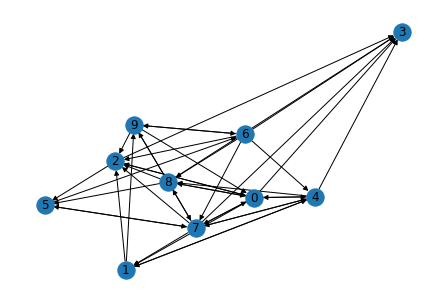

In [15]:
import random

def add_edges():
    nodes = list(G.nodes())
    for s in nodes:
        for t in nodes:
            if s!=t:
                r = random.random() #toss a coin randomly add edges
                if r<0.5:
                    G.add_edge(s,t)
    return G
                

G = nx.DiGraph()
G.add_nodes_from([i for i in range(10)])
G =add_edges()

#visualise the graph
import matplotlib.pyplot as plt 
%matplotlib inline

nx.draw(G,with_labels= True)
plt.show()

[137.5, 49.16666666666667, 232.5, 124.16666666666667, 62.5, 95.83333333333334, 54.16666666666667, 120.00000000000001, 91.66666666666667, 32.5]
Press # to stop ,enter to continuen
[121.875, 38.75, 360.4166666666667, 81.45833333333334, 62.91666666666667, 88.75, 51.458333333333336, 116.25000000000001, 44.791666666666664, 33.333333333333336]
Press # to stop ,enter to continuek
[104.6875, 29.045138888888893, 460.13888888888886, 70.50347222222223, 58.90625, 80.57291666666667, 40.45138888888889, 91.23263888888889, 40.97222222222223, 23.489583333333336]
Press # to stop ,enter to continuej
[91.30425347222223, 23.513454861111114, 543.4353298611111, 58.46571180555556, 51.69053819444444, 68.28776041666667, 32.94487847222222, 79.35763888888889, 31.40190972222223, 19.598524305555557]
Press # to stop ,enter to continuej
[77.48101128472223, 19.46650752314815, 613.8313802083334, 48.86158130787037, 44.06358506944444, 59.15545428240742, 27.80255353009259, 67.52061631944444, 25.61722366898148, 16.20008680

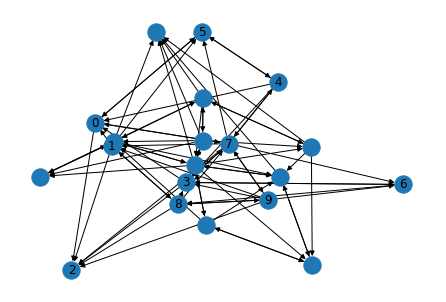

In [17]:

import networkx as nx
import random as R
import matplotlib.pyplot as plt

def add_edges():
    nodes=list(G.nodes())
    for i in range(len(nodes)):
        for j in range(len(nodes)):
            if nodes[j]!=nodes[i]:
                rand=R.random()
                if rand<0.5:
                    G.add_edge(i,j)

    return G

def assign_points(G):
    nodes=list(G.nodes())
    p=[]
    for _ in nodes:
        p.append(100)
    return p


def distribute_points(G,points):
    nodes=list(G.nodes())
    new_points=[]
    for i in range(len(nodes)):
        new_points.append(0)
        
    for n in nodes:
        out=list(G.out_edges(n))
        if len(out):
            share=points[n]/len(out)
            for (src,tgt) in out:
                new_points[tgt]+=share
        else:
            new_points[n]=new_points[n]+points[n]
    return new_points


def keep_distributing(points,G):
    
    while(1):
        new_pt=distribute_points(G,points)
        print(new_pt)
        points=new_pt
        stop=input("Press # to stop ,enter to continue")
        if stop=="#":
            break
    return new_pt


def rank_points(final_points):
    #make a dictionary to assign key value pair
    d={}
    for i in range(len(final_points)):
        #Assigning key with points
        d[i]=final_points[i]
     
        #sort the dictionary on the basis of key which is here function lambda
        # where f is representing the dictionary f[1] denotes value at index 1
    print(sorted(d.items(),key=lambda f:f[1]))
        

G=nx.DiGraph()
G.add_nodes_from([i for i in range(10)])
G=add_edges()

#Add labels to nodes
nx.draw(G,with_labels=True)


#Assign points to each nodes so that we can distribute later
points = assign_points(G)


#distribute points
final_points=keep_distributing(points,G)


#rank all the points
rank_points(final_points)


#lets compare with default networkx function to check whether our calculated results are matching the values calculated by default functions itself
result=nx.pagerank(G) #Gives more upto 2 decimal places compared to our results
print(sorted(result.items(),key=lambda f:f[1]))

nx.draw(G)
plt.show()
